In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
os.makedirs("../images/", exist_ok=True)
path = "/home/greca/Downloads/resultados_triagem1.xls"
excel = pd.read_excel(path)
excel.head()

bibtex_key                                              title  \
0         NaN  Analysis of Constant-Q Filterbank Based Repres...   
1         NaN  Analysis of Sub-Integral Functions in the Aggr...   
2         NaN  Feature Extraction Algorithms to Improve the S...   
3         NaN  Innovative Variational AutoEncoder for an End-...   
4         NaN  Performance of DWT-ANN based signal detector/e...   

                                              author                  journal  \
0  Singh, Premjeet and Waldekar, Shefali and Sahi...   Digit. Signal Process.   
1  Karczmarek, Pawe\l{} and Powroznik, Pawel and ...                      NaN   
2  Koduru, Anusha and Valiveti, Hima Bindu and Bu...  Int. J. Speech Technol.   
3  Alawad, Mohamad A. and Hamdan, Mutasem Q. and ...              IEEE Access   
4  Rajbhandari, S. and Ghassemlooy, Z. and Angelo...                      NaN   

   year                source    pages volume  \
0  2022   ACM Digital Library      NaN    130   
1  2022   ACM Digital Library      1–8    NaN   
2  2020   ACM Digital Library    45–55     23   
3  2022  IEEE Digital Library      1-1    NaN   
4  2008  IEEE Digital Library  106-109    NaN   

                                            abstract document_type  ...  \
0                                               None           NaN  ...   
1  Speech emotion recognition is a complicated an...           NaN  ...   
2  In this digitally growing era speech emotion r...           NaN  ...   
3  Powered by deep learning (DL), autoencoders (A...           NaN  ...   
4  Artificial neural network (ANN) finds its appl...           NaN  ...   

        issn language note  selection_criteria    created_at    updated_at  \
0  1051-2004      NaN  NaN  Estudos duplicados  45018.887616  45018.889977   
1        NaN      NaN  NaN  Estudos duplicados  45018.887616  45018.889421   
2  1381-2416      NaN  NaN  Estudos duplicados  45018.887616  45018.888750   
3  2169-3536      NaN  NaN  Estudos duplicados  45018.866262  45018.870185   
4        NaN      NaN  NaN  Estudos duplicados  45018.866262  45018.869063   

    created_by   updated_by    status comments  
0  rafaelgreca  rafaelgreca  Rejected      NaN  
1  rafaelgreca  rafaelgreca  Rejected      NaN  
2  rafaelgreca  rafaelgreca  Rejected      NaN  
3  rafaelgreca  rafaelgreca  Rejected      NaN  
4  rafaelgreca  rafaelgreca  Rejected      NaN  

[5 rows x 26 columns]

In [3]:
temp = excel.copy()
temp = temp["status"].value_counts().reset_index()
temp = temp.replace({
    "Rejected": "Rejeitados",
    "Accepted": "Aceitos",
})
temp.columns = ["status", "total"]

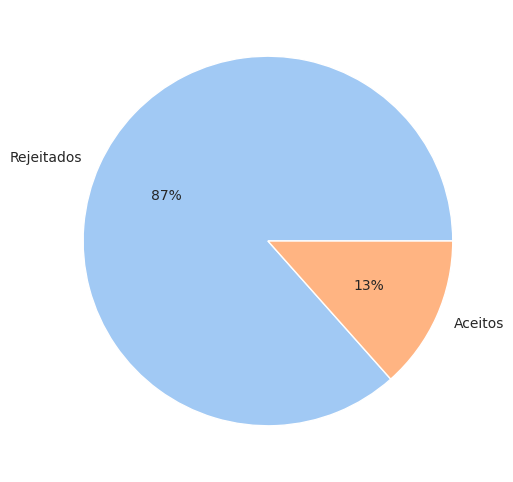

In [4]:
plt.figure(figsize=(8, 6))

colors = sns.color_palette('pastel')[0:2]

ax = plt.pie(
    temp["total"].values.tolist(),
    labels = temp["status"].values.tolist(),
    autopct = '%.0f%%',
    colors = colors
)
plt.savefig("../images/triagem1.png")

In [7]:
rejecteds = excel[excel["status"] == "Rejected"].copy()
rejecteds = rejecteds.reset_index(drop=True)
rejecteds = rejecteds[["title", "author", "journal", "year", "source", "selection_criteria"]]
rejecteds_by_criteria = rejecteds.replace({
    "Estudos duplicados": "Duplicados",
    "Estudos que não são sobre reconhecimento de emoções da fala": "Fora do tema de REF",
    "Estudos secundários": "Secundários",
    "Estudos antes de 2018": "Antes de 2018",
    "Estudos em qualquer idioma que não seja inglês": "Outros",
    "Livros, capítulo de livros, slides, pôsteres ou páginas na web": "Outros",
    "Estudos que não utilizam wavelets": "Outros"
})
rejecteds_by_criteria = rejecteds_by_criteria["selection_criteria"].value_counts().reset_index()
rejecteds_by_criteria.columns = ["criteria", "total"]

del rejecteds

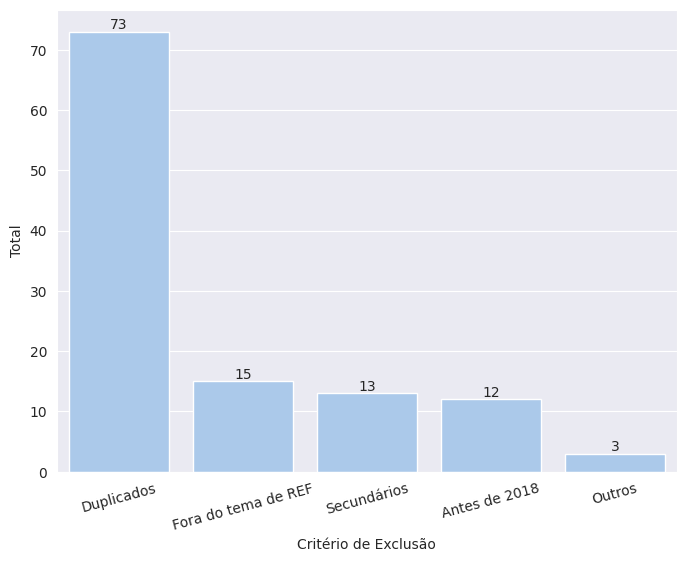

In [8]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(
    data=rejecteds_by_criteria,
    x="criteria",
    y="total",
    color=colors[0]
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation=15)
plt.xlabel("Critério de Exclusão")
plt.ylabel("Total")
plt.savefig("../images/triagem1_rejeitados.png")